Praktek TF-IDF
=============================

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('clean_dataset_stem.csv',sep=';')

In [3]:
dataset.shape

(902, 10)

In [4]:
dataset.head(3)

,Unnamed: 0.1,Unnamed: 0,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...


In [5]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [6]:
dataset_feature

0      cegah mata rantai covid kita rumah hingga hari...
1      aku mohon yaallah moga wabah covid hilang rama...
2      pemprov papua naik status jadi tanggap darurat...
3                      covid nyampe prigen mbak hmm hoax
4      nyuruh orang pintar lu aja togog kerumun orang...
                             ...                        
897    seluruh negara dunia alami masa sulit covid ra...
898    covid skripsi disaster selesai mau bgt bljr ma...
899    malam projek benda bincang malam fb satu belia...
900                          pontang panting koyak covid
901    masalah sekarang isu jangkit covid alaaaa bosa...
Name: ProcessedText, Length: 902, dtype: object

In [7]:
dataset_label = dataset['Sentimen']

In [8]:
dataset_label

0      1.0
1      1.0
2      1.0
3      0.0
4     -1.0
      ... 
897    1.0
898    1.0
899    0.0
900   -1.0
901   -1.0
Name: Sentimen, Length: 902, dtype: float64

# cek distribusi label

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\widas\AppData\Local\Temp\ipykernel_3496\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


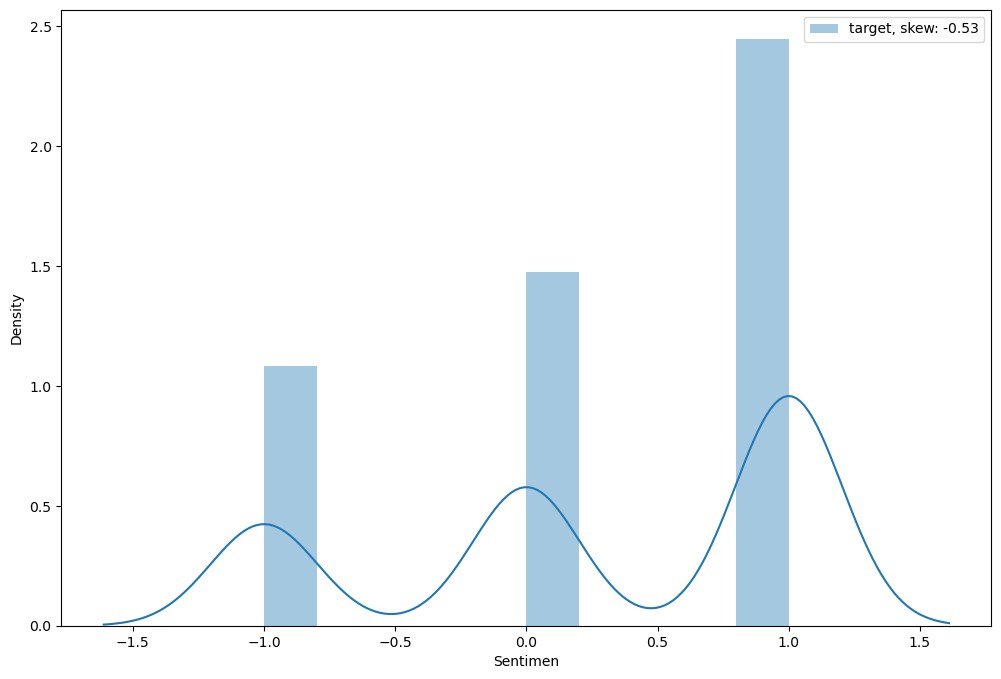

In [10]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [11]:
dataset_label.value_counts()

Sentimen
 1.0    441
 0.0    266
-1.0    195
Name: count, dtype: int64

# TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer()

In [14]:
positive_reviews = dataset[(dataset["Sentimen"] == 1)]
negative_reviews = dataset[(dataset["Sentimen"] == -1)]
neutral_reviews = dataset[(dataset["Sentimen"] == 0)]

In [15]:
positive_reviews.head()

,Unnamed: 0.1,Unnamed: 0,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
6,6,6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",1.0,selamat pagi hari jumat jumat keempat di kala ...,"['selamat', 'pagi', 'hari', 'jumat', 'jumat', ...","['selamat', 'pagi', 'hari', 'jumat', 'jumat', ...",selamat pagi hari jumat jumat keempat di kala ...,selamat pagi hari jumat jumat keempat di kala ...,selamat pagi hari jumat jumat empat kala pande...
7,7,7,"Hikmah di balik musibah covid-19, smg para pej...",1.0,hikmah di balik musibah covid smg para pejab...,"['hikmah', 'di', 'balik', 'musibah', 'covid', ...","['hikmah', 'di', 'balik', 'musibah', 'covid', ...",hikmah di balik musibah covid smg para pejabat...,hikmah di balik musibah covid smg para pejabat...,hikmah balik musibah covid smg jabat perintah ...


In [16]:
Positive_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_tf_idf = Positive_tf_idf_vect.fit_transform(positive_reviews["ProcessedText"].values)

In [17]:
Positive_tf_idf.shape

(441, 7781)

In [21]:
# features = Positive_tf_idf_vect.get_feature_names()

feature_names = Positive_tf_idf_vect.get_feature_names_out()


In [22]:
idfValues = Positive_tf_idf_vect.idf_

In [25]:
d = dict(zip(feature_names, 9 - idfValues))

In [26]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [27]:
for i in range(200):
    print(sortedDict[i])

('covid', 7.97247532660991)
('virus', 6.083077387817939)
('cegah', 6.067573201281974)
('sebar', 6.0195639820956135)
('corona', 5.934041808657451)
('moga', 5.878982031474424)
('sama', 5.878982031474424)
('rumah', 5.737331514411396)
('yg', 5.737331514411396)
('wabah', 5.669890233615864)
('semua', 5.597569572036238)
('masyarakat', 5.464038179411716)
('perintah', 5.464038179411716)
('sehat', 5.464038179411716)
('tangan', 5.464038179411716)
('jaga', 5.405197679388782)
('bantu', 5.342677322407448)
('virus corona', 5.342677322407448)
('indonesia', 5.309887499584457)
('laku', 5.309887499584457)
('satu', 5.309887499584457)
('segera', 5.309887499584457)
('wabah covid', 5.309887499584457)
('beri', 5.275985947908776)
('corona covid', 5.275985947908776)
('pandemi', 5.275985947908776)
('sebar covid', 5.275985947908776)
('lawan', 5.2408946280975055)
('jadi', 5.20452698392663)
('hari', 5.166786655943784)
('tetap', 5.166786655943784)
('virus covid', 5.166786655943784)
('ada', 5.127565942790502)
('pande

In [28]:
# !pip3 install wordcloud

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [30]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

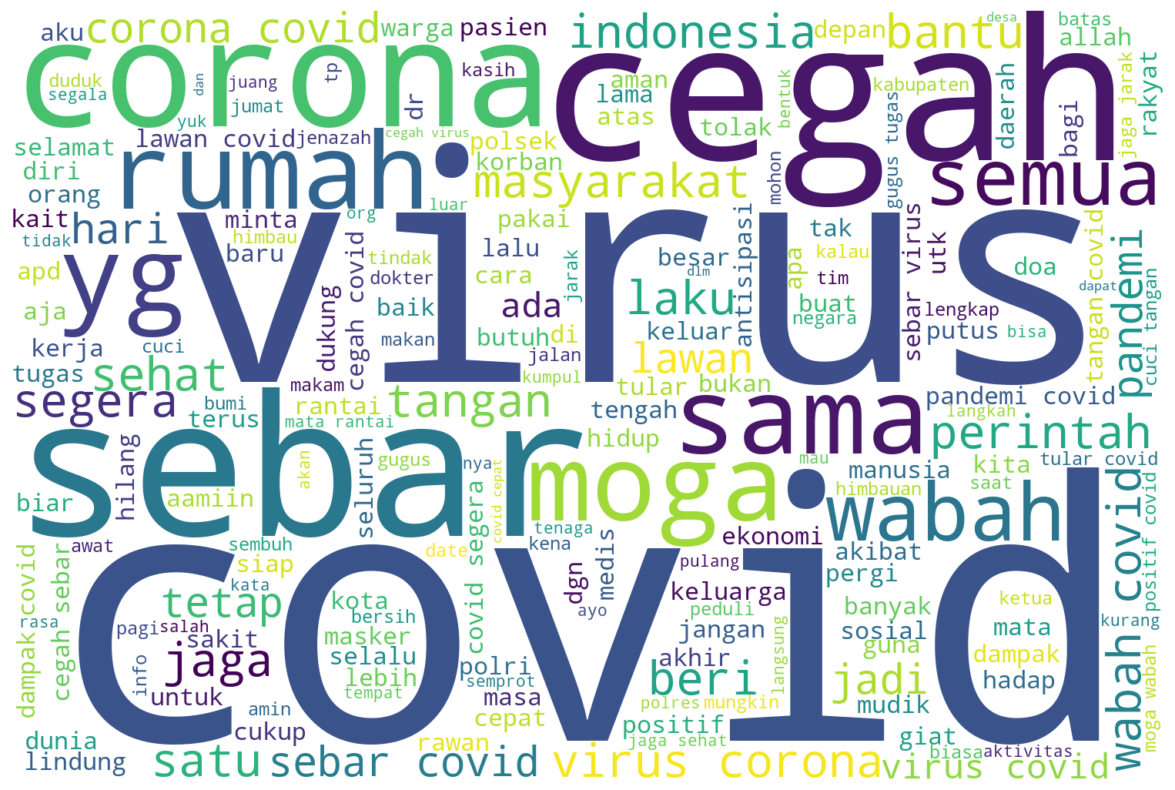

In [31]:
PlotWordCloud(d)

# silakan lakukan untuk netral dan negative

In [33]:
# Neutral reviews TF-IDF
Neutral_tf_idf_vect = TfidfVectorizer(ngram_range=(1, 2))
Neutral_tf_idf = Neutral_tf_idf_vect.fit_transform(neutral_reviews["ProcessedText"].values)
Neutral_tf_idf.shape

(266, 5154)

In [34]:
# Get feature names and IDF values
feature_names = Neutral_tf_idf_vect.get_feature_names_out()
idfValues = Neutral_tf_idf_vect.idf_

In [35]:
# Create a dictionary with feature names and their corresponding IDF values
d = dict(zip(feature_names, 1 - idfValues))

In [36]:
# Sort the dictionary in descending order based on IDF values
sortedDict = sorted(d.items(), key=lambda x: x[1], reverse=True)


In [38]:
# Print the top 200 features with their IDF values
print("Top 200 features with their IDF values (Neutral reviews):")
for i in range(200):
    print(sortedDict[i])

Top 200 features with their IDF values (Neutral reviews):
('covid', -0.03817257350502978)
('yg', -1.898369204286313)
('orang', -2.409194828052304)
('positif', -2.4517544424711)
('date', -2.5915163848462583)
('hari', -2.5915163848462583)
('indonesia', -2.642809679233809)
('ni', -2.642809679233809)
('ada', -2.6968769005040847)
('mau', -2.6968769005040847)
('pasien', -2.6968769005040847)
('baru', -2.7540353143440335)
('jadi', -2.7540353143440335)
('virus', -2.7540353143440335)
('banyak', -2.8146599361604685)
('lebih', -2.8146599361604685)
('kasus', -2.8791984572980396)
('positif covid', -2.8791984572980396)
('tinggal', -2.8791984572980396)
('kena', -2.948191328784991)
('pandemi', -2.948191328784991)
('update', -2.948191328784991)
('apa', -3.0222993009387125)
('rumah', -3.0222993009387125)
('buat', -3.102342008612249)
('bukan', -3.102342008612249)
('dgn', -3.102342008612249)
('di', -3.102342008612249)
('ga', -3.102342008612249)
('kalo', -3.102342008612249)
('pandemi covid', -3.102342008612

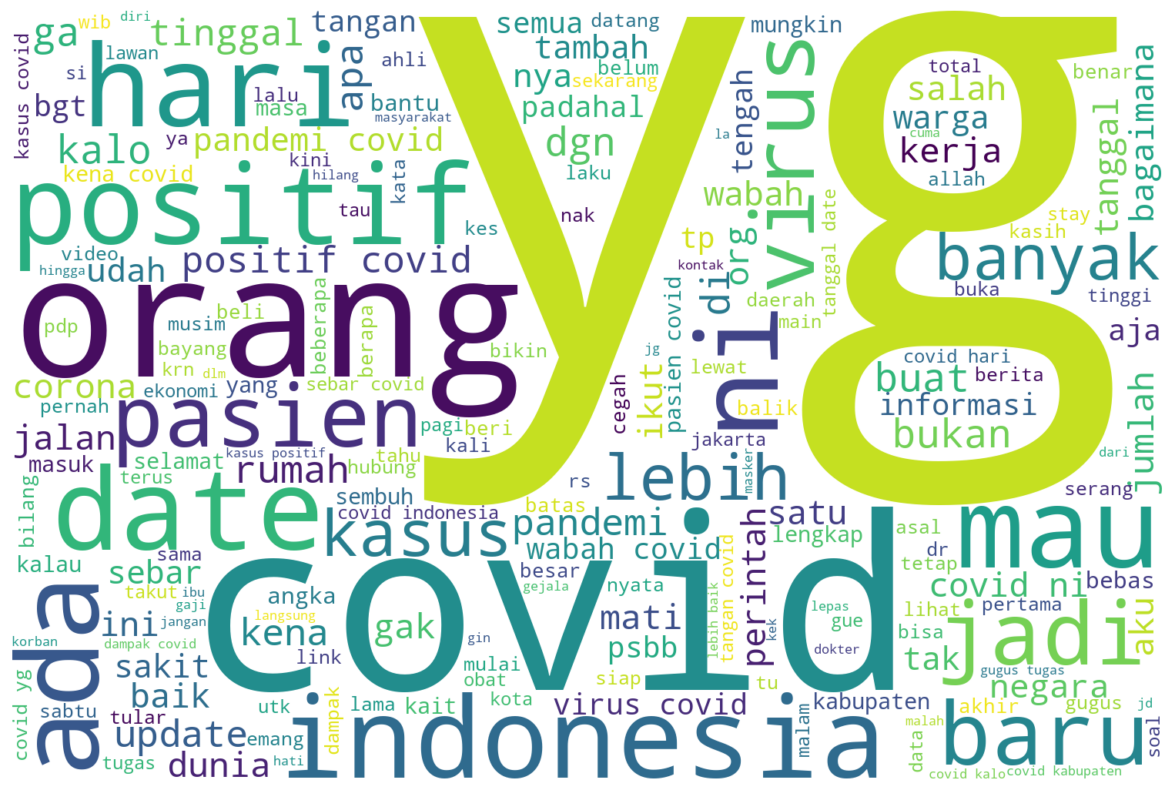

In [39]:
PlotWordCloud(d)

In [40]:
# Calculate TF-IDF for negative reviews
Negative_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Negative_tf_idf = Negative_tf_idf_vect.fit_transform(negative_reviews["ProcessedText"].values)
Negative_tf_idf.shape

(195, 4174)

In [41]:
# Get feature names and IDF values
negative_feature_names = Negative_tf_idf_vect.get_feature_names_out()
negative_idf_values = Negative_tf_idf_vect.idf_

In [42]:
# Create a dictionary of feature names and negative IDF values
negative_dict = dict(zip(negative_feature_names, negative_idf_values))

In [43]:
# Sort the dictionary based on IDF values
sorted_negative_dict = sorted(negative_dict.items(), key=lambda d: d[1], reverse=True)

In [44]:
# Print top 200 terms with their negative TF-IDF values
for i in range(200):
    print(sorted_negative_dict[i])

('abang', 5.584967478670572)
('abdul covid', 5.584967478670572)
('abdul hamid', 5.584967478670572)
('abis covid', 5.584967478670572)
('abis ngasih', 5.584967478670572)
('abyasa', 5.584967478670572)
('abyasa balikpapan', 5.584967478670572)
('acah', 5.584967478670572)
('acah elit', 5.584967478670572)
('acara di', 5.584967478670572)
('acara itu', 5.584967478670572)
('acara pantesan', 5.584967478670572)
('ada covid', 5.584967478670572)
('ada korban', 5.584967478670572)
('ada virus', 5.584967478670572)
('adalah bagaimana', 5.584967478670572)
('adalah perintah', 5.584967478670572)
('adminstrasi', 5.584967478670572)
('adminstrasi psbb', 5.584967478670572)
('adoiii', 5.584967478670572)
('adoiii bebal', 5.584967478670572)
('ae', 5.584967478670572)
('ae lu', 5.584967478670572)
('afiat', 5.584967478670572)
('afiat musibah', 5.584967478670572)
('agama memang', 5.584967478670572)
('agama sih', 5.584967478670572)
('ah dok', 5.584967478670572)
('ah mau', 5.584967478670572)
('aidilfitri', 5.5849674786

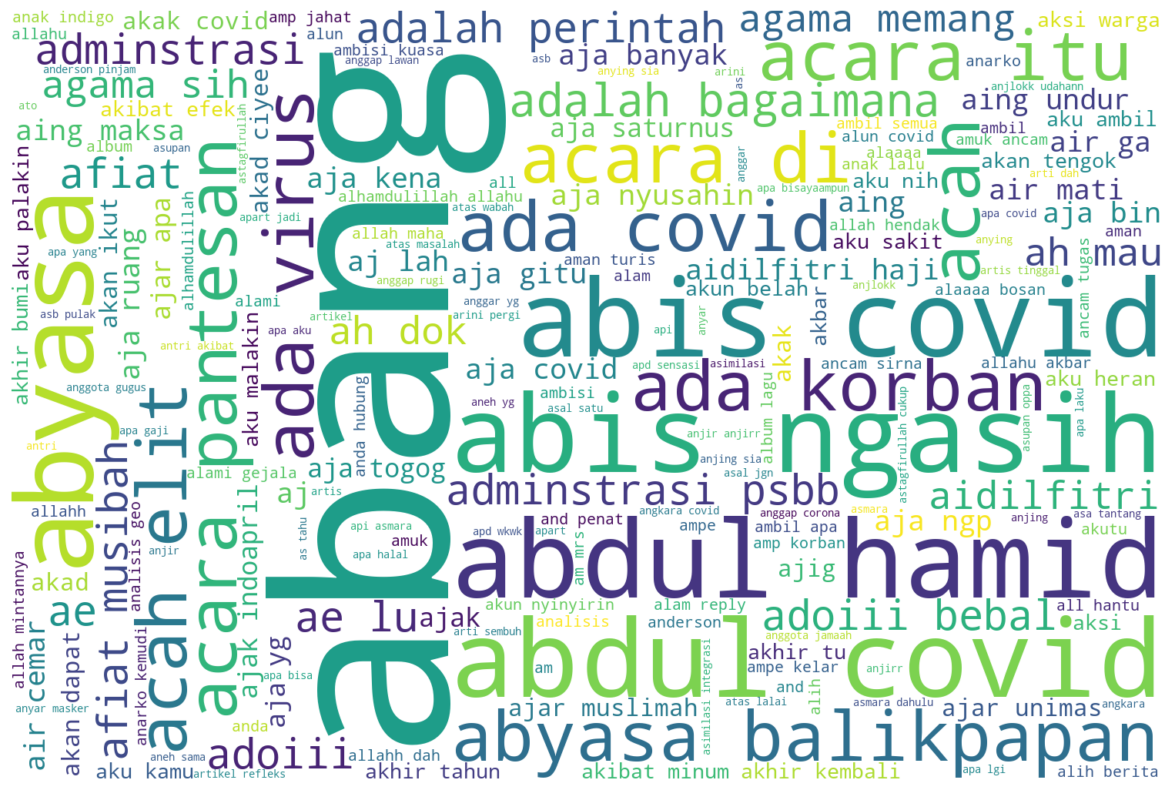

In [45]:
# Plot word cloud for negative TF-IDF values
PlotWordCloud(negative_dict)